# Applied ML Project

## Dataset description

The New York Kaggle Airbnb dataset is a comprehensive dataset that contains detailed information on Airbnb listings in New York City, USA. The dataset includes over 48,000 listings and 16 features, including the listing price, location, neighbourhood, number of bedrooms, number of bathrooms, number of reviews, minimum number of nights, and more. This dataset provides a wealth of information that can be used for various purposes, including market analysis, price prediction, and recommendations.





## Exploratory Data Analysis

In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')

# loading in data
airbnb_df = pd.read_csv('/content/drive/My Drive/AB_NYC_2019.csv')
"""

Mounted at /content/drive


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

airbnb_df = pd.read_csv("AB_NYC_2019.csv")

In [ ]:
# Checking the shape of the dataset
print(f"Number of rows: {airbnb_df.shape[0]}")
print(f"Number of columns: {airbnb_df.shape[1]}")

# Checking the column names
print("\nColumn names:\n", airbnb_df.columns)

# Checking the data types
print("\nData types:\n", airbnb_df.dtypes)

Number of rows: 48895
Number of columns: 16

Column names:
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Data types:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_c

In [ ]:
# Checking for missing values
print("\nMissing values:\n", airbnb_df.isnull().sum())


Missing values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Checking the descriptive statistics of numerical columns
print("\nDescriptive statistics:\n", airbnb_df.describe())


Descriptive statistics:
                  id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min       

### Data Cleaning

In [ ]:
# last_review isn't particularly useful, and host_name is a sensitive attribute that 
# also won't help us to predict prices
airbnb_df.drop(['id','host_name','last_review'], axis=1, inplace=True)
airbnb_df.fillna({'reviews_per_month':0}, inplace=True)


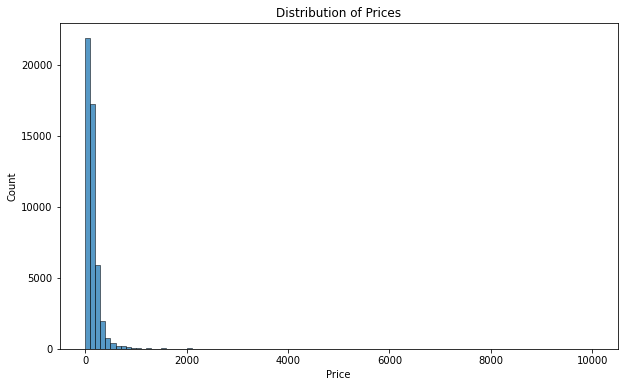

In [ ]:
# Plotting the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df.price, bins=100)
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

Based on the above plot, it's clear that the majority of prices are clustered within the 0-500 range, but there are also some large outliers (perhaps luxury homes and apartments) that have much higher prices.

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

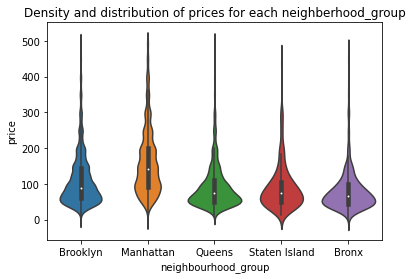

In [ ]:
# Examining which boroughs are the most popular

no_outliers = airbnb_df[airbnb_df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
plot = sns.violinplot(data=no_outliers, x='neighbourhood_group', y='price')
plot.set_title('Density and distribution of prices for each neighberhood_group')

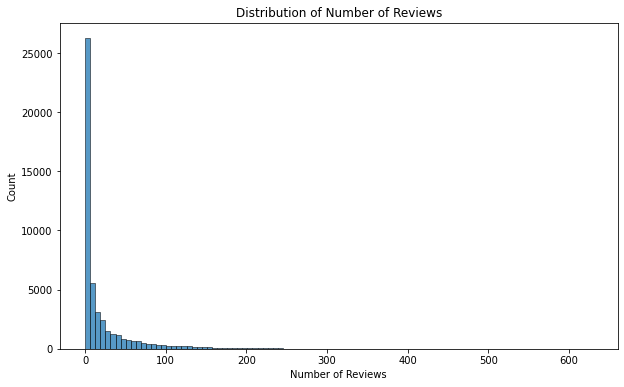

In [ ]:
# Plotting the distribution of the number of reviews
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df.number_of_reviews, bins=100)
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

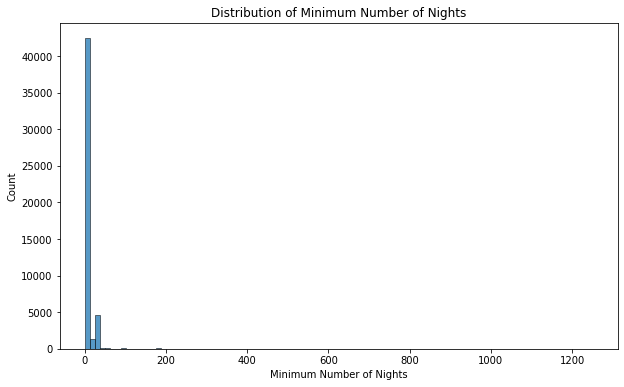

In [ ]:
# Plotting the distribution of the minimum number of nights
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df.minimum_nights, bins=100)
plt.title("Distribution of Minimum Number of Nights")
plt.xlabel("Minimum Number of Nights")
plt.ylabel("Count")
plt.show()

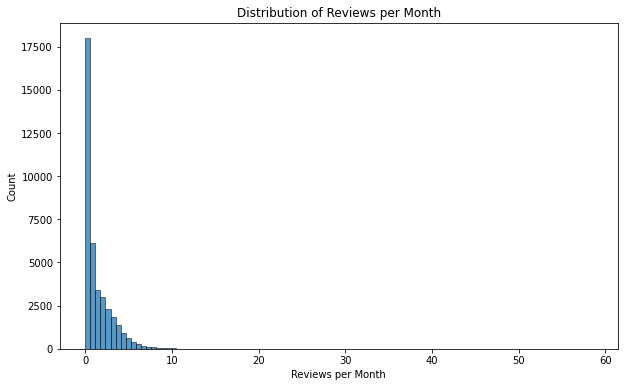

In [ ]:
# Plotting the distribution of reviews per month
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df.reviews_per_month.dropna(), bins=100)
plt.title("Distribution of Reviews per Month")
plt.xlabel("Reviews per Month")
plt.ylabel("Count")
plt.show()


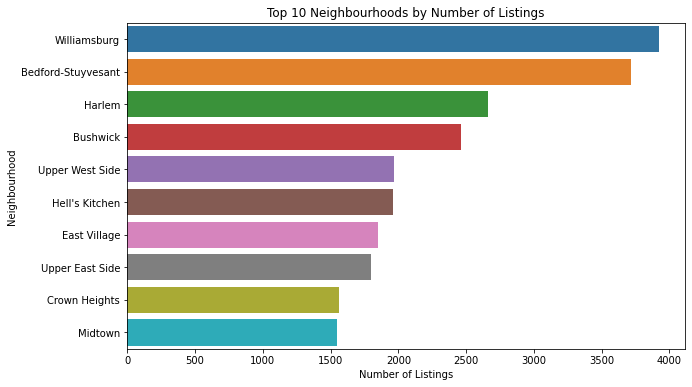

In [ ]:
# Plotting the top 10 neighbourhoods by number of listings
plt.figure(figsize=(10, 6))
sns.countplot(y=airbnb_df.neighbourhood, order=airbnb_df.neighbourhood.value_counts().iloc[:10].index)
plt.title("Top 10 Neighbourhoods by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighbourhood")
plt.show()


A plot of the top 10 Neighbourhoods by number of listings is shown here. It's interesting that rapidly gentrifying neighborhoods such as Wiliamsburg and Bedford-Stuyvesant are the most popular by total number of Airbnb listings.

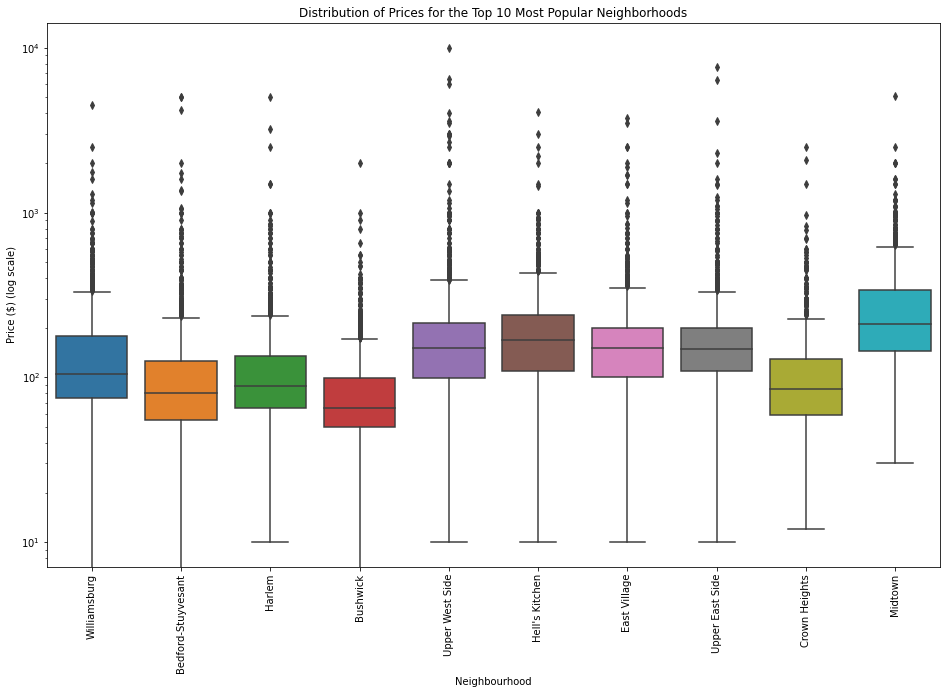

In [ ]:
# Plotting the distribution of prices by neighbourhood for the top 10 neighborhoods
plt.figure(figsize=(16, 10))
sns.boxplot(x="neighbourhood", y="price", data=airbnb_df, order=airbnb_df.neighbourhood.value_counts().iloc[:10].index)
plt.title("Distribution of Prices for the Top 10 Most Popular Neighborhoods")
plt.xlabel("Neighbourhood")
plt.ylabel("Price ($) (log scale)")
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

Here we have a plot of airbnb prices in the top 10 most popular neighbourhoods where prices are displayed on a log scale. Midtown appears to have the highest median price for airbnb rentals, followed by other Manhattan and Brooklyn neighbourhoods.

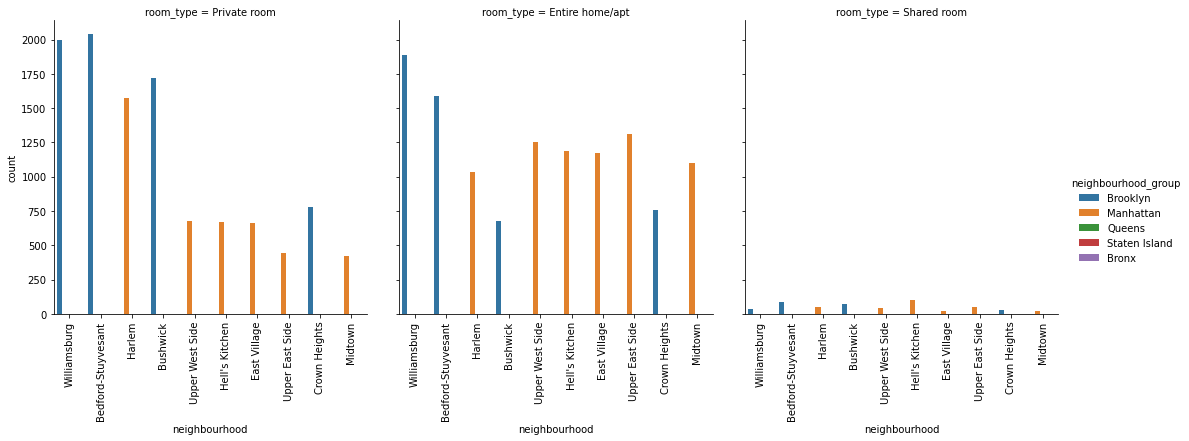

In [ ]:
# Inspecting the distribution of room types across popular neighborhoods
room_types=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=airbnb_df, order=airbnb_df.neighbourhood.value_counts().iloc[:10].index, kind='count')
room_types.set_xticklabels(rotation=90)

As we can tell from the plot, Manhattan and Brooklyn are the two most popular boroughs by Airbnb neighborhood popularity. Additionally, it makes sense that Private Rooms and Entire home/apartments are far more popular than Shared rooms for Airbnb rentals. 

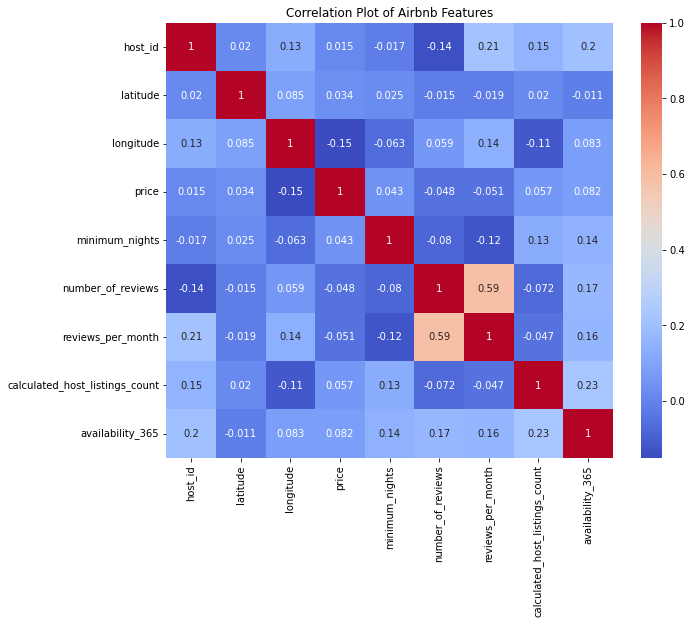

In [ ]:
# Generate correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(airbnb_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot of Airbnb Features')
plt.show()

Based on a correlation plot of the features chosen for examining our airbnb data, the only highly correlated features are reviews_per_month and number_of_reviews. It makes a lot of sense for these two features to be highly correlated because a high number of reviews per month would likely suggest a high number of total reviews.